<a href="https://colab.research.google.com/github/FlorianLngnbrg/schoolstuff/blob/main/Quicksort_Komplexit%C3%A4t.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

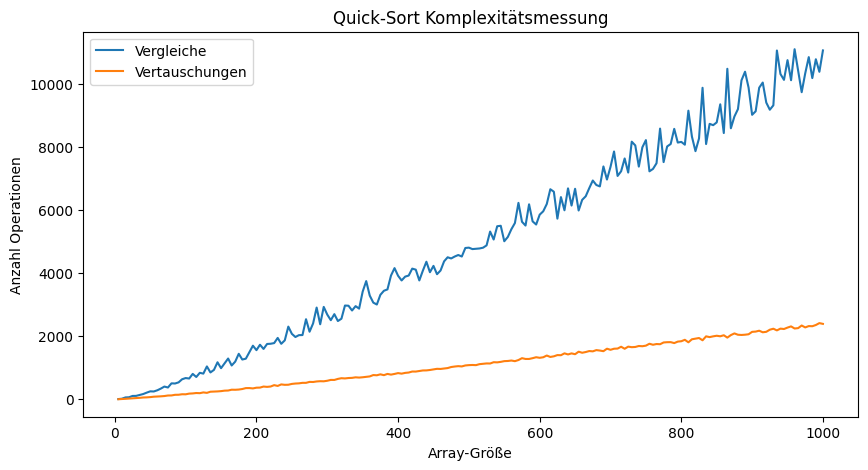

In [1]:
import random
import matplotlib.pyplot as plt

def quicksort(arr, lo=0, hi=None, counter=None):
    if counter is None:
        counter = {'vergleiche': 0, 'tausche': 0}
    if hi is None:
        hi = len(arr) - 1
    if lo < hi:
        p, counter = partition(arr, lo, hi, counter)
        quicksort(arr, lo, p - 1, counter)
        quicksort(arr, p + 1, hi, counter)
    return counter

def partition(arr, lo, hi, counter):
    pivot = arr[lo]
    i = lo + 1
    j = hi
    while True:
        while i <= j and arr[i] < pivot:
            counter['vergleiche'] += 1
            i += 1
        while i <= j and arr[j] > pivot:
            counter['vergleiche'] += 1
            j -= 1
        if i >= j:
            break
        arr[i], arr[j] = arr[j], arr[i]
        counter['tausche'] += 1
    arr[lo], arr[j] = arr[j], arr[lo]
    counter['tausche'] += 1
    return j, counter

def generate_random_array(n):
    arr = list(range(1, n + 1))
    random.shuffle(arr)
    return arr

def measure_complexity():
    sizes = list(range(5, 1001, 5))
    comparisons = []
    swaps = []
    for size in sizes:
        arr = generate_random_array(size)
        counter = quicksort(arr)
        comparisons.append(counter['vergleiche'])
        swaps.append(counter['tausche'])
    plt.figure(figsize=(10, 5))
    plt.plot(sizes, comparisons, label='Vergleiche')
    plt.plot(sizes, swaps, label='Vertauschungen')
    plt.xlabel('Array-Größe')
    plt.ylabel('Anzahl Operationen')
    plt.title('Quick-Sort Komplexitätsmessung')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    measure_complexity()
